# **05-01 코사인 유사도 (Cosine Similarity)**

---



### **벡터의 유사도(Vector Similarity)**

> 기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있음





## **코사인 유사도**

---



두 벡터 간의 코사인 각도를 이용해 구할 수 있는 두 벡터의 유사도 (-1 ~ 1, 1에 가까울수록 유사도 높)

두 벡터의 방향 >

1 : 완전히 동일한 경우

0 : 90°의 각을 이루는 경우

-1 : 180°로 반대의 방향을 가지는 경우

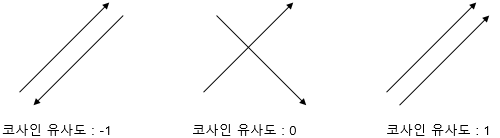

두 벡터 A, B에 대해 코사인 유사도 식으로 표현

> 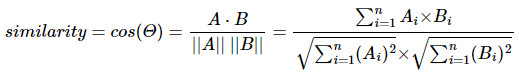

문서 단어 행렬이나 TF-IDF 행렬을 통해 문서 유사도 구하는 경우, 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됨

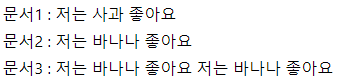

띄어쓰기 기준 토큰화 진행했다고 가정, 문서 단어 행렬을 만들면 이와 같음

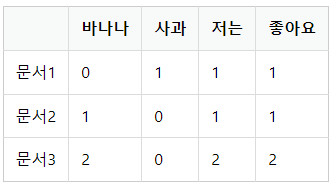

Numpy를 사용해 각 문서 벡터 간의 코사인 유사도 계산

In [2]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서1과 문서2의 유사도 : 0.6666666666666667
문서1과 문서3의 유사도 : 0.6666666666666667
문서2와 문서3의 유사도 : 1.0000000000000002


문서2와 문서3 유사도 : 1 -> 문서3은 문서2에서 모든 단어 빈도수가 1씩 증가했을 뿐 (한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우, 기존의 문서와 코사인 유사도 값이 1임)

예) 문서 A,B는 동일한 주제이지만 B가 A보다 2배의 길이를 가지며, 문서 C는 다른 주제이지만 A와 길이 차이가 거의 없다고 가정

이런 경우 유클리드 거리로 유사도 연산을 하면 A가 B보다 C와 유사도가 더 높게 나올 수 있음(문서의 길이가 영향받음). 이런 경우 코사인 유사도가 해결 가능(벡터의 방향(패턴)에 초점)

## **유사도를 이용한 추천 시스템 구현하기**

---



캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템 만들기, 파일 'movies_metadata.csv' (https://www.kaggle.com/rounakbanik/the-movies-dataset)

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


코사인 유사도에 사용할 데이터: title열, overview열

좋아하는 영화 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화 찾아서 추천하는 시스템

In [4]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

TF-IDF를 연산할 때 데이터에 Null값 들어있으면 에러 발생. TF-IDF의 대상이 되는 overview 열에 결측값 확인하기

In [5]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [6]:
# 결측값을 빈 값(empty value)으로 대체
data['overview'] = data['overview'].fillna('')

overview열에 대해 TF-IDF 행렬 구한 후, 행렬의 크기 출력

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


20,000개의 영화를 표현하기 위해서 총 47,487개의 단어 사용되었음을 의미. 또는 47,487차원의 문서 벡터가 20,000개 존재한다고도 표현 가능

20,000개의 문서 벡터에 대해 상호 간의 코사인 유사도 구하기

In [8]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


20,000개의 각 문서 벡터(영화 줄거리)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬 (모든 20,000개 영화의 상호 유사도 기록)

기존 dataframe으로부터 영화의 title을 key, 영화의 index를 value로 하는 dictionary 'title_to_index' 만들기

In [9]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


선택한 영화의 title 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화 찾아내는 함수 만들기

In [10]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [11]:
# 영화 다크 나이트 라이즈와 overview가 유사한 영화들 찾아보기
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object